<a href="https://colab.research.google.com/github/amelyarusli/customer-segmentation/blob/main/Copy_of_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A) Business Background


##Business Requirement and Objective

Reksadana company in Indonesia which makes an application that can buy and sell mutual funds.

To provide recommendations to the marketing team regarding the thematic campaigns that can be launched in the next month, based on user preferences and segmentation analysis of data from mutual fund buying and selling application.

Users Dataset (Spreadsheet): 
  
*  https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/edit#gid=0

Daily User Transaction (Spreadsheet): 

*     https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/edit#gid=0

Data Dictionary 
*   https://docs.google.com/spreadsheets/d/1QRikTmrABC_xtmcnHRjcivbVLK1iwfPMjFy3CNVMNAo/edit#gid=1180665284

#B) Data Preparation

##Import Library

In [2]:
import pandas as pd                       #library used for working with data sets and perform data analysis
import numpy as np                        #to perform mathematical operation and statistics
import seaborn as sns                     #to perform data visualizazion
import matplotlib.pyplot as plt           #to perform data visualizazion

##Import Dataset

###Users (Spreadsheet)

In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_replace)

https://docs.google.com/spreadsheets/d/1J5Ofh-LJNdcE93phdGP4jQnpYnHLwzm_D8EKkGY5bio/export?format=csv&gid=0


In [4]:
df_user_og = pd.read_csv(sheet_url_replace)
df_user_og.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [5]:
df_user_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


###Daily user transaction (Spreadsheet)

In [6]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/edit#gid=0'
sheet_url_replace = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_replace)

https://docs.google.com/spreadsheets/d/1QngelF-Sb8nY2OUiKHxMSLu3uSIk4MZy-6hv3jw5W58/export?format=csv&gid=0


In [7]:
df_dut_org = pd.read_csv(sheet_url_replace)
df_dut_org.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


#C) Data Cleaning

##Users

In [8]:
df_user = df_user_og.copy()

In [9]:
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


###Check Data Type

In [10]:
df_user.shape

(14712, 11)

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [12]:
df_user.isnull().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight


*   data type user_id can be changed into string 
*   data type registration_import_datetime can be changed into datetime
*   referral_code_used, 9108 row null



Change user_id data type from int to string

In [13]:
df_user['user_id'] = df_user['user_id'].astype(str)
df_user['user_id'].dtype

dtype('O')

Change registration_import_datetime data type from string to datetime  

In [14]:
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])
df_user['registration_import_datetime'].dtype

dtype('<M8[ns]')

In [15]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

Appropriate data type

###Check Values dan Typos

In [16]:
df_user.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

In [17]:
df_user['registration_import_datetime'].value_counts()

2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
2021-08-10 10:55:26    5
2021-09-17 14:10:39    5
2021-08-05 10:18:13    5
                      ..
2021-10-02 16:54:43    1
2021-09-28 10:16:08    1
2021-10-02 16:25:15    1
2021-10-17 02:57:16    1
2021-10-22 00:55:26    1
Name: registration_import_datetime, Length: 11536, dtype: int64

In [18]:
df_user['user_gender'].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [19]:
df_user['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [20]:
df_user['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [21]:
df_user['referral_code_used'].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [22]:
df_user['user_income_source'].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

Insight

There is no typos in each columns

###Treat Missing Values

There is missing value in referral_code_used columns

In [23]:
df_user['referral_code_used'].unique()

array([nan, 'used referral'], dtype=object)

Input missing value into "no referral"

In [24]:
df_user['referral_code_used'].fillna("no referral", inplace=True)

In [25]:
df_user['referral_code_used'].unique()

array(['no referral', 'used referral'], dtype=object)

In [26]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

Now, there is no missing value

###Data Manipulation

Creating category for user_income_range

In [27]:
df_user['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [28]:
a = df_user['user_income_range']
#to make easier to assign the data into the category

In [29]:
df_user.loc[(a == '< 10 Juta'), 'user_income_category'] = 'very-low'
df_user.loc[(a == 'Rp 10 Juta - 50 Juta'), 'user_income_category'] = 'low'
df_user.loc[(a == '> Rp 50 Juta - 100 Juta'), 'user_income_category'] = 'medium'
df_user.loc[(a == '> Rp 100 Juta - 500 Juta'), 'user_income_category'] = 'medium-high'
df_user.loc[(a == '> Rp 500 Juta - 1 Miliar') | (a == '> Rp 1 Miliar'), 'user_income_category'] = 'high'


In [30]:
df_user['user_income_category'].value_counts()

very-low       6275
low            4816
medium         2390
medium-high    1114
high            117
Name: user_income_category, dtype: int64

###Check Duplicate

In [31]:
df_user[df_user['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_category


There is no data duplicate

###User Clean Data

In [32]:
df_user_clean = df_user.copy()

In [33]:
df_user_clean.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,user_income_category
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0,high
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0,medium
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0,low
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,medium
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,high


In [34]:
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  user_income_category        

In [35]:
df_user_clean['user_id'].value_counts().sort_values()

162882     1
3792092    1
1071649    1
3816789    1
3802293    1
          ..
4344623    1
4286627    1
4352347    1
4286882    1
4401986    1
Name: user_id, Length: 14712, dtype: int64

##Daily User Transaction

In [36]:
df_dut = df_dut_org.copy()

In [37]:
df_dut.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


###Check Data Type

In [38]:
df_dut.shape

(158811, 17)

In [39]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [40]:
df_dut.isnull().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

Insight



*   user_id data type can be changed into string
*   date data type can be changed into datetime
*   total_buy_transaction_amount, total_sell_transaction_amount, and total_invested_amount data types can be changed into float because transaction amount can be float and the others transaction columns use float data
*   buy_saham_transaction_amount, 59780 row null
*   sell_saham_transaction_amount, 157003 row null
*   buy_pasar_uang_transaction_amount, 36548 row null
*   sell_pasar_uang_transaction_amount, 156801 row null
*   buy_pendapatan_tetap_transaction_amount, 59895 row null
*   sell_pendapatan_tetap_transaction_amount, 157230 row null
*   buy_campuran_transaction_amount, 153739 row null
*   sell_campuran_transaction_amount, 158765 row null
*   saham_invested_amount, 52519 row null
*   pasar_uang_invested_amount, 27730 row null
*   pendapatan_tetap_invested_amount, 52865 row null
*   campuran_invested_amount, 153459 row null


Change user_id data type into string

In [41]:
df_dut['user_id'] = df_dut['user_id'].astype(str)
df_dut['user_id'].dtype

dtype('O')

change date data type into datetime

In [42]:
df_dut['date'] = pd.to_datetime(df_dut['date'])
df_dut['date'].dtype

dtype('<M8[ns]')

Change columns with data type int into float because the value is transaction

In [43]:
df_dut = df_dut.astype({'total_buy_transaction_amount':'float','total_sell_transaction_amount':'float','total_invested_amount':'float'})

In [44]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Appropriate data type

###Check values and Typos

In [45]:
df_dut.columns

Index(['user_id', 'date', 'buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [46]:
df_dut['date'].value_counts()

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name: date, dtype: int64

In [47]:
df_dut['user_id'].value_counts()

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64

In [48]:
df_dut['sell_saham_transaction_amount'].value_counts()

-50000.0      265
-10000.0      187
-40000.0      136
-100000.0     132
-60000.0      108
             ... 
-49435.0        1
-1862599.0      1
-3725200.0      1
-396037.0       1
-10988.0        1
Name: sell_saham_transaction_amount, Length: 386, dtype: int64

There is no typos 

###Treat Missing Value

There is missing value :

* buy_saham_transaction_amount, 59780 row null
* sell_saham_transaction_amount, 157003 row null
* buy_pasar_uang_transaction_amount, 36548 row null
* sell_pasar_uang_transaction_amount, 156801 row null
* buy_pendapatan_tetap_transaction_amount, 59895 row null
* sell_pendapatan_tetap_transaction_amount, 157230 row null
* buy_campuran_transaction_amount, 153739 row null
* sell_campuran_transaction_amount, 158765 row null
* saham_invested_amount, 52519 row null
* pasar_uang_invested_amount, 27730 row null
* pendapatan_tetap_invested_amount, 52865 row null
* campuran_invested_amount, 153459 row null

In [49]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Input 0 for null value in columns with float data type, because its meaning there is no transaction

In [50]:
df_dut = df_dut.fillna(0)

In [51]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

###Check Duplicate

In [52]:
df_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [53]:
# df_dut[df_dut.duplicated(['user_id'])]
df_dut[df_dut['user_id'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
5,50701,2021-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158734,4157054,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158737,4157117,2021-09-30,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0,-10000.0,0.0,0.0,0.0,0.0,0.0
158739,4157132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0


There is any duplicate because this is the data transaction, so if the user_id doesn't make transaction, the data will be same with the previous day and it will be the same for the next day.

below, i will remove duplicate data for analysis purposes that are not related to time series. the data that i will take is the latest transaction data, which is the last balance of the user_id. the time series data above will still be kept to observe transaction trend data.

In [54]:
df_dut_dup = df_dut.copy()
df_dut_dup

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,10000.0,50000.0,0.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,10000.0


In [55]:
df_dut_dc = df_dut_dup.drop_duplicates('user_id',keep = 'last')
df_dut_dc

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
46,50961,2021-09-30,300000.0,0.0,600000.0,0.0,1200000.0,0.0,0.0,0.0,2100000.0,0.0,2000000.0,700000.0,1400000.0,0.0,4100000.0
74,53759,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,10000.0,20000.0,0.0,100000.0
99,54759,2021-09-30,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,12000000.0,0.0,0.0,12000000.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
158808,4165630,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,10000.0,50000.0,0.0,100000.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,10000.0


###Daily User Transaction Clean Data

####Time series data

In [56]:
df_dut_ts_clean = df_dut.copy()
df_dut_ts_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


In [57]:
df_dut_ts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

####Transaction data

In [58]:
df_dut_dc_clean = df_dut_dc.copy()
df_dut_dc_clean.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
23,50701,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
46,50961,2021-09-30,300000.0,0.0,600000.0,0.0,1200000.0,0.0,0.0,0.0,2100000.0,0.0,2000000.0,700000.0,1400000.0,0.0,4100000.0
74,53759,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,10000.0,20000.0,0.0,100000.0
99,54759,2021-09-30,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,12000000.0,0.0,0.0,12000000.0
136,61414,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_dut_dc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 23 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date                                      8277 non-null   datetime64[ns]
 2   buy_saham_transaction_amount              8277 non-null   float64       
 3   sell_saham_transaction_amount             8277 non-null   float64       
 4   buy_pasar_uang_transaction_amount         8277 non-null   float64       
 5   sell_pasar_uang_transaction_amount        8277 non-null   float64       
 6   buy_pendapatan_tetap_transaction_amount   8277 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  8277 non-null   float64       
 8   buy_campuran_transaction_amount           8277 non-null   float64       
 9   sell_campuran_transaction_a

##Merger Data

In [60]:
df_dutdc = df_dut_dc_clean.copy()
df_userc = df_user_clean.copy()
df_dutdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 23 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   date                                      8277 non-null   datetime64[ns]
 2   buy_saham_transaction_amount              8277 non-null   float64       
 3   sell_saham_transaction_amount             8277 non-null   float64       
 4   buy_pasar_uang_transaction_amount         8277 non-null   float64       
 5   sell_pasar_uang_transaction_amount        8277 non-null   float64       
 6   buy_pendapatan_tetap_transaction_amount   8277 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  8277 non-null   float64       
 8   buy_campuran_transaction_amount           8277 non-null   float64       
 9   sell_campuran_transaction_a

In [61]:
df_merged = df_userc.merge(df_dutdc, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,...,0.0,0.0,0.0,0.0,0.0,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,...,0.0,0.0,0.0,0.0,0.0,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,999000,149000,...,0.0,149000.0,0.0,149000.0,0.0,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,110431,1000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110431.0,0.0,110431.0


In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   8277 non-null   object        
 1   registration_import_datetime              8277 non-null   datetime64[ns]
 2   user_gender                               8277 non-null   object        
 3   user_age                                  8277 non-null   int64         
 4   user_occupation                           8277 non-null   object        
 5   user_income_range                         8277 non-null   object        
 6   referral_code_used                        8277 non-null   object        
 7   user_income_source                        8277 non-null   object        
 8   end_of_month_invested_amount              8277 non-null   int64         
 9   total_buy_amount              

Drop columns who doesn't use for analysis

In [63]:
df_merged.drop(['date','buy_saham_transaction_amount','sell_saham_transaction_amount',
                'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
               'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
                'total_buy_transaction_amount','total_sell_transaction_amount','end_of_month_invested_amount'], axis = 1, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   registration_import_datetime      8277 non-null   datetime64[ns]
 2   user_gender                       8277 non-null   object        
 3   user_age                          8277 non-null   int64         
 4   user_occupation                   8277 non-null   object        
 5   user_income_range                 8277 non-null   object        
 6   referral_code_used                8277 non-null   object        
 7   user_income_source                8277 non-null   object        
 8   total_buy_amount                  8277 non-null   int64         
 9   total_sell_amount                 8277 non-null   int64         
 10  user_income_category              8277 non-null 

In [64]:
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.0,0.0,110431.0,0.0,110431.0


##Checking Outlier

###The merged data

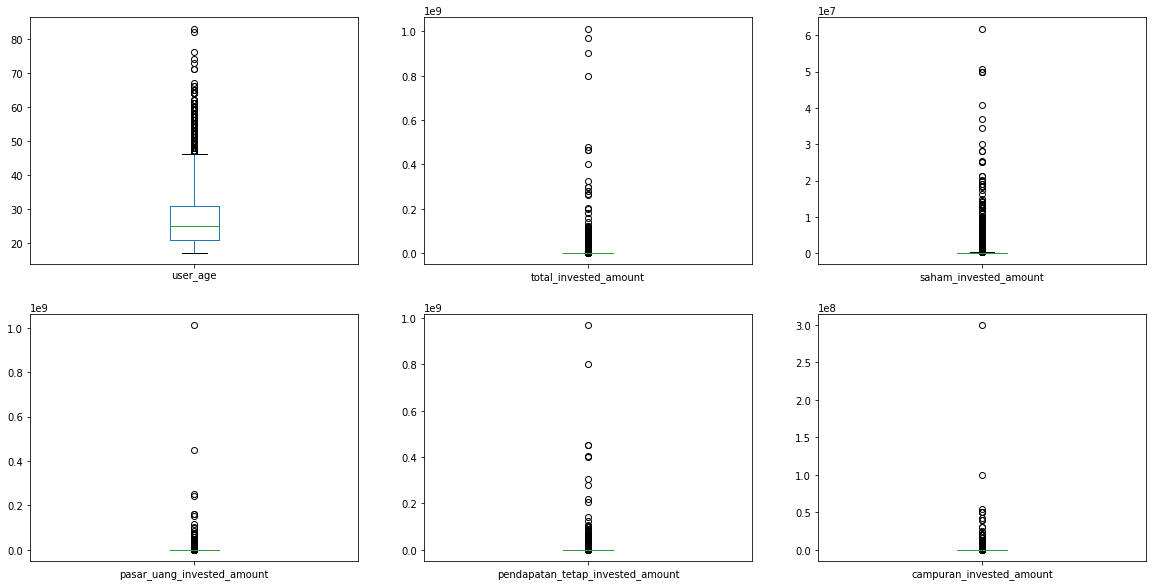

In [65]:
numerical_column = ['user_age', 'total_invested_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 'campuran_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()



*   exclude total_invested_amount, pasar_uang_invested_amount, and pendapatan_tetap_invested_amount above 700 million




In [66]:
df_merged = df_merged[~(df_merged['total_invested_amount']>700000000)]
df_merged = df_merged[~(df_merged['pasar_uang_invested_amount']>700000000)]
df_merged = df_merged[~(df_merged['pendapatan_tetap_invested_amount']>700000000)]

In [67]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8273 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8273 non-null   object        
 1   registration_import_datetime      8273 non-null   datetime64[ns]
 2   user_gender                       8273 non-null   object        
 3   user_age                          8273 non-null   int64         
 4   user_occupation                   8273 non-null   object        
 5   user_income_range                 8273 non-null   object        
 6   referral_code_used                8273 non-null   object        
 7   user_income_source                8273 non-null   object        
 8   total_buy_amount                  8273 non-null   int64         
 9   total_sell_amount                 8273 non-null   int64         
 10  user_income_category              8273 non-null 

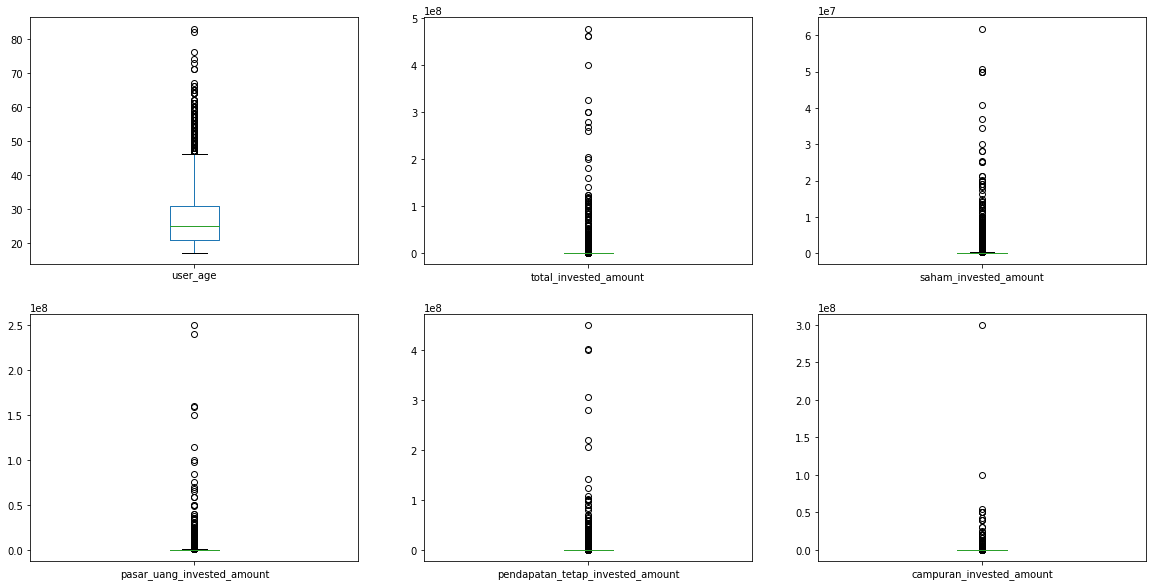

In [68]:
numerical_column = ['user_age', 'total_invested_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 'pendapatan_tetap_invested_amount', 'campuran_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()

###The time series data

In [69]:
df_dut.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000000.0,10000000.0


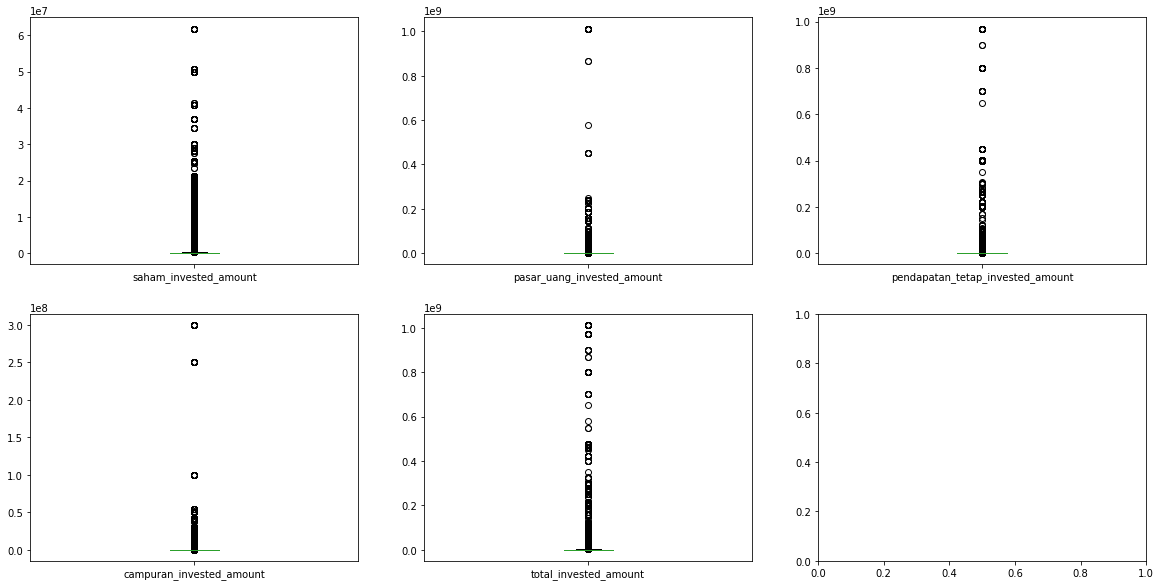

In [70]:
numerical_column_dut = ['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column_dut):
    a = df_dut.boxplot(el, ax=axes.flatten()[i],grid=False) # axes.flatten()[i] untuk ambil ALL AXES dari index i
plt.show()

I will no drop the outlier data because there is nothing outlier significant

#D) EDA (Exploratory Data Analysis)


##Descriptive Statistics
*   How many users do we have in the data
*   How is the demographic in the data 
*   How many users buy products in each mutual fund



In [72]:
df_eda = df_merged.copy()
df_eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.0,40000.0,270000.0,0.0,600000.0
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.0,1350000.0,3230000.0,0.0,13500000.0
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.0,10000.0,50000.0,899000.0,999000.0
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.0,10000.0,0.0,0.0,10000.0
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.0,0.0,110431.0,0.0,110431.0


In [73]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8273 entries, 0 to 8276
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8273 non-null   object        
 1   registration_import_datetime      8273 non-null   datetime64[ns]
 2   user_gender                       8273 non-null   object        
 3   user_age                          8273 non-null   int64         
 4   user_occupation                   8273 non-null   object        
 5   user_income_range                 8273 non-null   object        
 6   referral_code_used                8273 non-null   object        
 7   user_income_source                8273 non-null   object        
 8   total_buy_amount                  8273 non-null   int64         
 9   total_sell_amount                 8273 non-null   int64         
 10  user_income_category              8273 non-null 

### Descriptive information about numeric variable

In [74]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,8273.000,8273.000,8273.000,8273.000,8273.000
mean,336610.480,606983.620,993090.720,189665.460,2126350.270
std,2034859.950,6016756.290,11068658.800,3938810.050,15274549.660
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,0.000,10000.000,10000.000,0.000,100000.000
75%,100000.000,100000.000,110000.000,0.000,500000.000
max,61840000.000,250072498.000,450000000.000,300000000.000,478075955.000
kurtosis,349.360,872.200,904.000,4131.600,479.280
skewness,16.300,26.280,27.280,57.430,19.440


Insight



*   Average saham invested are 336,610 usd, the median is 0, minimum is 0 and the maximum after removing outlier are 61,840,000 usd
*   Average pasar uang invested are 606,983 usd, the median is 10,000 usd, minimum is 0 and the maximum after removing outlier are 250,072,498 usd
*   Average pendapatan tetap invested are 993,090 usd, the median is 10,000 usd, minimum is 0 and the maximum after removing outlier are 450,000,000 usd
*   Average campuran invested are 189,665 usd, the median is 0, minimum is 0 and the maximum after removing outlier are 300,000,000 usd
* Pendapatan tetap has the highest average investment



### Descriptive information about object variable

In [75]:
objects = ['user_id',
 'user_gender',
 'user_occupation',
 'referral_code_used',
 'user_income_source',
 'user_income_category']
df_eda[objects].describe()

,user_id,user_gender,user_occupation,referral_code_used,user_income_source,user_income_category
count,8273,8273,8273,8273,8273,8273
unique,8273,2,9,2,10,5
top,3816789,Male,Pelajar,no referral,Gaji,very-low
freq,1,5174,4473,5319,5139,3526


Insight


*   we have 8273 user
*   The most frequent user gender are males
*   The most frequent user occupation are students
*   Most user do not use a referral
*   The most user income source is from salary
*   The most user income category is very low or in range under 10 million



### Descriptive information about date type variable

In [76]:
df_eda['registration_import_datetime'].describe()

<ipython-input-76-9de327b2f30c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['registration_import_datetime'].describe()


count                    8273
unique                   6578
top       2021-09-17 14:10:39
freq                        5
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

Insight:
The registration user data start from 2021-08-01 to 2021-09-28

###Number of user

In [77]:
df_eda['user_id'].count()

8273

Insight: We have 8273 user in the data

###Demographics Data

In [78]:
df_occ = df_eda.groupby(['user_occupation'])['user_id'].count().sort_values(ascending=False)
df_occ = df_occ.reset_index()
df_occ.head()

,user_occupation,user_id
0,Pelajar,4473
1,Swasta,1866
2,Others,928
3,IRT,477
4,Pengusaha,323


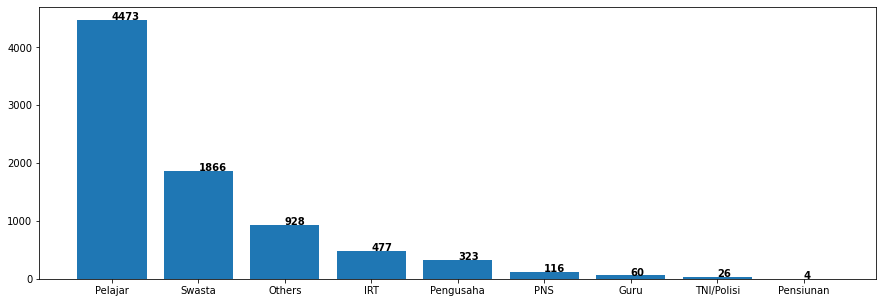

In [79]:
fig = plt.figure(figsize =(15, 5))

P = df_occ.copy()

P.sort_values('user_id', ascending=False, inplace=True)
x = P['user_occupation']
y = P['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

Insight

Many users who make investments come from students and the second is private sector employee


In [80]:
# df_age = df_eda.groupby(['user_age']).agg(['count'])['user_id'].sort_values(by='user_age', ascending = False)
# df_age.head()
df_age = df_eda.groupby(['user_age'])['user_id'].count().sort_values(ascending=False)
df_age = df_age.reset_index()
df_age.head()

,user_age,user_id
0,21,693
1,20,614
2,23,553
3,22,549
4,24,514


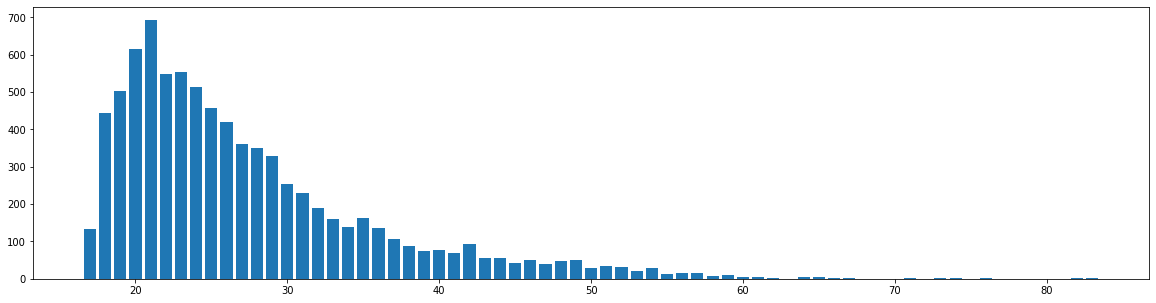

In [81]:
fig = plt.figure(figsize =(20, 5))

A= df_age.copy()
A.sort_values('user_age', ascending=True, inplace=True)
x = A['user_age']
y = A['user_id']


plt.bar(x, y)   #Create the bar chart
plt.show()

Insight

Users who invest a lot are mostly in productive age (18 until 30 years old)

In [82]:
df_income = df_eda.groupby(['user_income_source'])['user_id'].count().sort_values(ascending=False)
df_income = df_income.reset_index()
df_income

,user_income_source,user_id
0,Gaji,5139
1,Keuntungan Bisnis,998
2,Undian,928
3,Dari Orang Tua / Anak,507
4,Lainnya,256
5,Tabungan,256
6,Hasil Investasi,90
7,Dari Suami / istri,60
8,Warisan,26
9,Bunga Simpanan,13


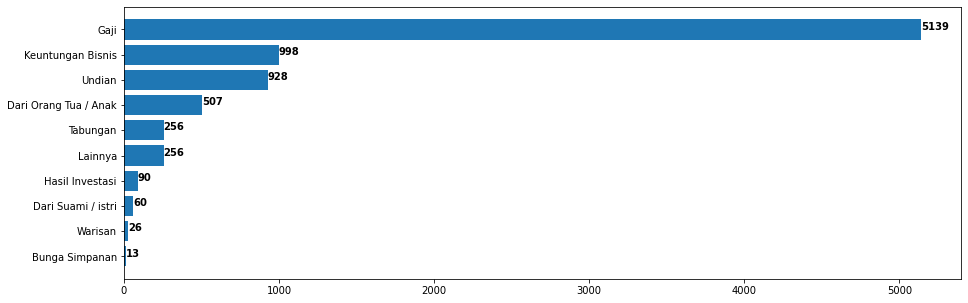

In [83]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = df_income.copy()   

K.sort_values('user_id', ascending=True, inplace=True) 
x = K['user_income_source']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels, using for loops
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

In [84]:
df_income['percentage'] = np.round(df_income['user_id']/df_income['user_id'].sum() * 100,2)   
df_income

,user_income_source,user_id,percentage
0,Gaji,5139,62.120
1,Keuntungan Bisnis,998,12.060
2,Undian,928,11.220
3,Dari Orang Tua / Anak,507,6.130
4,Lainnya,256,3.090
5,Tabungan,256,3.090
6,Hasil Investasi,90,1.090
7,Dari Suami / istri,60,0.730
8,Warisan,26,0.310
9,Bunga Simpanan,13,0.160


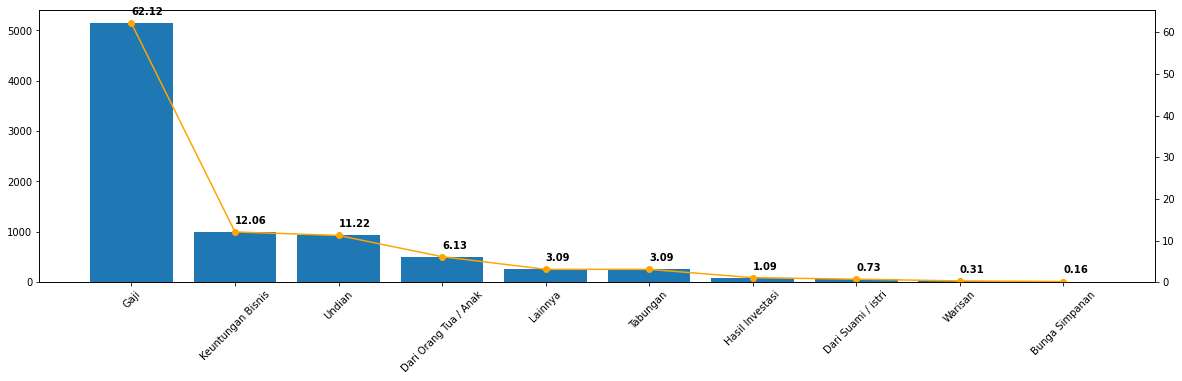

In [85]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = df_income['user_income_source']
y_bar = df_income['user_id']
y_line = df_income['percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'orange')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):                                   
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

Insight

* The most user income source comes from salary
* The least user income source come from bunga simpanan and warisan

In [86]:
df_referral = df_eda.groupby('referral_code_used')['user_id'].count()
df_referral = df_referral.reset_index()   #Reset the index to make it into a pandas dataframe
df_referral

,referral_code_used,user_id
0,no referral,5319
1,used referral,2954


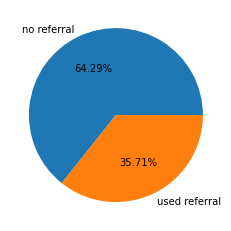

In [87]:
plt.pie(df_referral['user_id'], labels = df_referral['referral_code_used'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight

Not many users have joined through referrals yet, users have joined with referral just 36%

In [88]:
df_occ = df_eda.groupby('user_income_category')['user_id'].count()
df_occ = df_occ.reset_index()   #Reset the index to make it into a pandas dataframe
df_occ

,user_income_category,user_id
0,high,64
1,low,2706
2,medium,1341
3,medium-high,636
4,very-low,3526


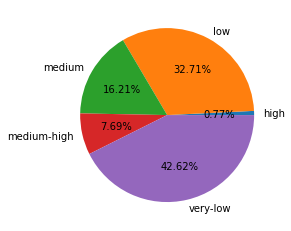

In [89]:
plt.pie(df_occ['user_id'], labels = df_occ['user_income_category'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight

* The most user income category is very low (income under 10 million)
* The highest user income category comes from very low and low. Its mean the most user income under 50 million

###The user buy product in each mutual fund

In [90]:
sa = df_eda['saham_invested_amount']
df_eda.loc[(sa == 0), 'saham_transaction'] = 'no transaction'
df_eda.loc[(sa > 0), 'saham_transaction'] = 'transaction'

pu = df_eda['pasar_uang_invested_amount']
df_eda.loc[(pu == 0), 'pasar_uang_transaction'] = 'no transaction'
df_eda.loc[(pu > 0), 'pasar_uang_transaction'] = 'transaction'

pt = df_eda['pendapatan_tetap_invested_amount']
df_eda.loc[(pt == 0), 'pend_tetap_transaction'] = 'no transaction'
df_eda.loc[(pt > 0), 'pend_tetap_transaction'] = 'transaction'

ca = df_eda['campuran_invested_amount']
df_eda.loc[(ca == 0), 'campuran_transaction'] = 'no transaction'
df_eda.loc[(ca > 0), 'campuran_transaction'] = 'transaction'

df_eda

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,total_buy_amount,total_sell_amount,user_income_category,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,saham_transaction,pasar_uang_transaction,pend_tetap_transaction,campuran_transaction
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,100000,0,medium,290000.000,40000.000,270000.000,0.000,600000.000,transaction,transaction,transaction,no transaction
1,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,8500000,0,high,8920000.000,1350000.000,3230000.000,0.000,13500000.000,transaction,transaction,transaction,no transaction
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,no referral,Gaji,149000,0,very-low,40000.000,10000.000,50000.000,899000.000,999000.000,transaction,transaction,transaction,transaction
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,0,0,very-low,0.000,10000.000,0.000,0.000,10000.000,no transaction,transaction,no transaction,no transaction
4,3783302,2021-09-14 08:16:54,Male,57,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,1000000,-1889569,medium,0.000,0.000,110431.000,0.000,110431.000,no transaction,no transaction,transaction,no transaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Lainnya,350000,-450000,medium-high,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction
8273,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,25000,-125000,low,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction
8274,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,240000,0,medium,210000.000,130000.000,95000.000,0.000,435000.000,transaction,transaction,transaction,no transaction
8275,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no referral,Gaji,150000,-250000,medium-high,0.000,0.000,0.000,0.000,0.000,no transaction,no transaction,no transaction,no transaction


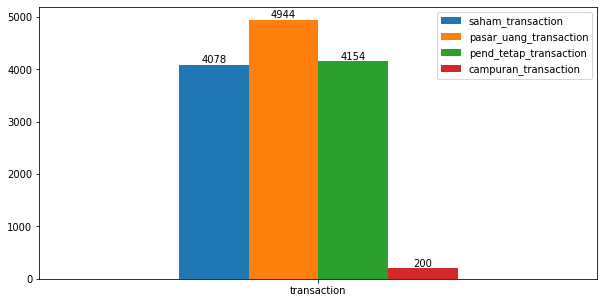

In [91]:
transaction_bar = df_eda[['user_id','saham_transaction','pasar_uang_transaction','pend_tetap_transaction','campuran_transaction']]

df_filtered_saham_transaction = transaction_bar.loc[transaction_bar['saham_transaction'] == 'transaction']
result_filtered_saham_transaction = df_filtered_saham_transaction.groupby('saham_transaction')['user_id'].count()
result_filtered_saham_transaction.columns = ['saham_transaction', 'user_id']

df_filtered_pasar_uang_transaction = transaction_bar.loc[transaction_bar['pasar_uang_transaction'] == 'transaction']
result_filtered_pasar_uang_transaction = df_filtered_pasar_uang_transaction.groupby('pasar_uang_transaction')['user_id'].count()
result_filtered_pasar_uang_transaction.columns = ['pasar_uang_transaction', 'user_id']

df_filtered_pend_tetap_transaction = transaction_bar.loc[transaction_bar['pend_tetap_transaction'] == 'transaction']
result_filtered_pend_tetap_transaction = df_filtered_pend_tetap_transaction.groupby('pend_tetap_transaction')['user_id'].count()
result_filtered_pend_tetap_transaction.columns = ['pend_tetap_transaction', 'user_id']

df_filtered_campuran_transaction = transaction_bar.loc[transaction_bar['campuran_transaction'] == 'transaction']
result_filtered_campuran_transaction = df_filtered_campuran_transaction.groupby('campuran_transaction')['user_id'].count()
result_filtered_campuran_transaction.columns = ['campuran_transaction', 'user_id']

# Create a dictionary of series
merged_data = {'saham_transaction': result_filtered_saham_transaction, 'pasar_uang_transaction': result_filtered_pasar_uang_transaction, 'pend_tetap_transaction': result_filtered_pend_tetap_transaction, 'campuran_transaction': result_filtered_campuran_transaction}

# Create a dataframe from the dictionary
merged_df = pd.DataFrame(merged_data)

# Print the resulting dataframe
merged_bar = merged_df.plot(kind='bar', width=0.5)

for i in merged_bar.containers:
    merged_bar.bar_label(i, label_type='edge')

fig = merged_bar.figure
fig.set_size_inches(10, 5)

plt.xticks(rotation = 360)

plt.show()

Insight

Most users conduct transactions in money market investments, followed by stock investments and fixed income. Mixed investments are rarely used by users

Recommendation

1. Increase the referral program to encourage more users to join through referrals and provide attractive incentives for users who successfully invite their friends to join.
2. Expand the types of investments offered, especially mixed investments, which are currently rarely used by users. Special promotions can also be carried out for this type of investment to increase user interest.
3. Focus on productive age users in introducing new types of investment, as productive age users tend to have a large amount of investment and will have a significant impact on the amount of investment made by users.
4. Increase promotion of stock investments to attract more users and increase the amount of investment in this type of investment.
5. Increase promotion of fixed income investments to attract more users and increase the amount of investment in this type of investment, as this type of investment is the most popular among users.
6. Provide more diverse investment options for users with higher income categories, such as stock investments, properties, or equity-based mutual funds, as users in this income category have the potential to make larger investments and tend to seek more diverse types of investments.

##Finding pattern



*   There any trend on the transaction
*   Transaction trends for mutual fund



In [92]:
df_pat = df_dut.copy()

In [93]:
df_pat.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000000.000,10000000.000


###Trend Transaction

####Total transaction amount

In [94]:
df_tran = df_pat.groupby('date')['total_invested_amount'].sum()
df_tran = df_tran.reset_index()   #Reset the index to make it into a pandas dataframe
df_tran.head()

,date,total_invested_amount
0,2021-08-04,54158326.000
1,2021-08-05,128766000.000
2,2021-08-06,286932955.000
3,2021-08-09,543456467.000
4,2021-08-10,490934176.000


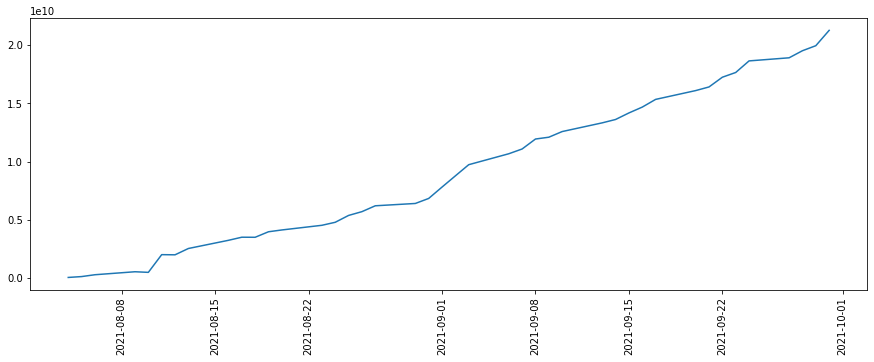

In [95]:
plt.figure(figsize =(15, 5))

plt.xticks(rotation = 90)
plt.plot(df_tran['date'], df_tran['total_invested_amount'])

plt.show()

####Total user transaction

In [132]:
# Group by date and count the number of user_ids where total_invested_amount is greater than 0
df_us = df_pat.groupby('date')['user_id'].agg(lambda x: (x[df_pat['total_invested_amount'] > 0]).count())
df_us = df_us.reset_index()   #Reset the index to make it into a pandas dataframe
df_us.head()

,date,user_id
0,2021-08-04,113
1,2021-08-05,198
2,2021-08-06,306
3,2021-08-09,394
4,2021-08-10,529


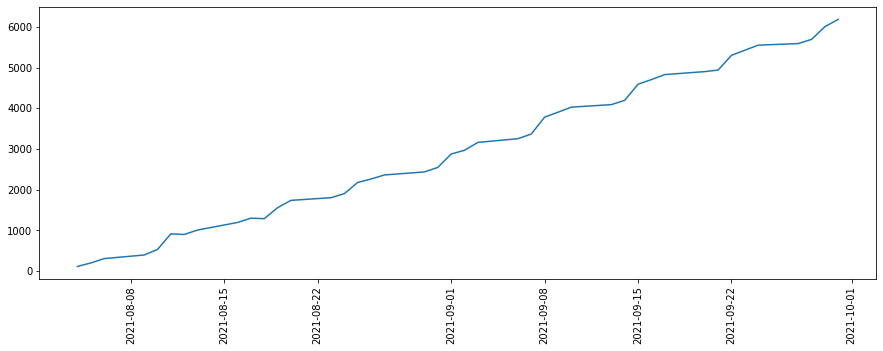

In [133]:
plt.figure(figsize =(15, 5))

plt.xticks(rotation = 90)
plt.plot(df_us['date'], df_us['user_id'])

plt.show()

Insight
* The trend seems identical, significantly increased
* so it probably that the total invested amount are directly caused by the number of user 

###Transaction trend by mutual fund

####Transaction by mutual fund

In [98]:
transaction_trend = df_dut[['user_id','date','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']]    #Pick variable that wanted to be analyzed
transaction_trend.head()

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,10000000.000
1,50701,2021-08-31,0.000,0.000,0.000,10000000.000
2,50701,2021-09-01,0.000,0.000,0.000,10000000.000
3,50701,2021-09-02,0.000,0.000,0.000,10000000.000
4,50701,2021-09-03,0.000,0.000,0.000,10000000.000


In [99]:
transaction_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           158811 non-null  object        
 1   date                              158811 non-null  datetime64[ns]
 2   saham_invested_amount             158811 non-null  float64       
 3   pasar_uang_invested_amount        158811 non-null  float64       
 4   pendapatan_tetap_invested_amount  158811 non-null  float64       
 5   campuran_invested_amount          158811 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ MB


In [100]:
#Change the transaction into a column using pivot
transaction_trend_pivot = transaction_trend.pivot_table(index = 'date',  
                                                        values = ('saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount'))
transaction_trend_pivot = transaction_trend_pivot.reset_index() 
transaction_trend_pivot.head()

,date,campuran_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,saham_invested_amount
0,2021-08-04,94017.094,105897.658,87848.718,175128.205
1,2021-08-05,109313.725,148456.049,216786.108,156650.000
2,2021-08-06,148888.889,270559.190,318908.603,172541.587
3,2021-08-09,201877.934,567919.692,316228.136,189693.643
4,2021-08-10,229116.118,156924.617,295665.834,169132.558


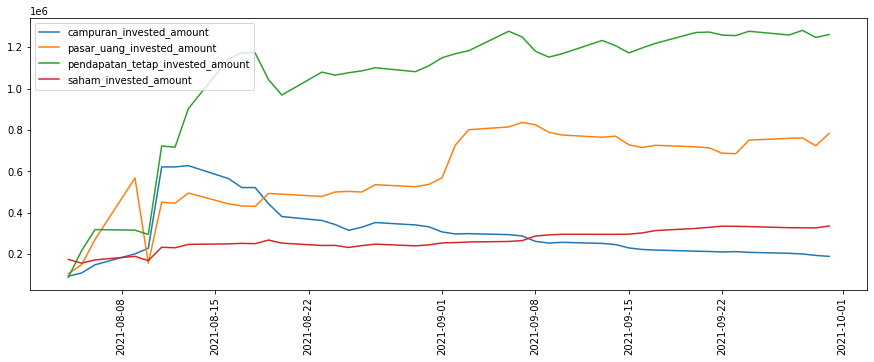

In [101]:
#Create line chart
plt.figure(figsize =(15, 5))
axis = transaction_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:    
  plt.plot(transaction_trend_pivot['date'], transaction_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(transaction_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Insight


* There is a significant decreasing trend around August 10, 2021
* The largest amount of invested amount is in fixed income
* The lowest invested amount in September is in mixed investments
* The stable investment from August to September is in stocks
* Money market is the second most frequent investment after fixed income



####Transaction by the user

In [102]:
transaction_user_trend = df_dut[['date','user_id','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']].sort_values(by='date')   #Pick variable that wanted to be analyzed
transaction_user_trend.head()

,date,user_id,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
34729,2021-08-04,3739617,50000.000,10000.000,40000.000,0.000
33543,2021-08-04,3737288,0.000,0.000,0.000,2500000.000
34212,2021-08-04,3738819,0.000,0.000,0.000,0.000
4525,2021-08-04,925437,40000.000,10000.000,50000.000,0.000
33048,2021-08-04,3736615,220000.000,20000.000,60000.000,0.000


In [103]:
saham = transaction_user_trend['saham_invested_amount']
transaction_user_trend.loc[(saham == 0), 'user_saham'] = 'no transaction'
transaction_user_trend.loc[(saham > 0), 'user_saham'] = 'transaction'

df_shm = transaction_user_trend[['date','user_saham']]

# Group by date and count the number of True and False flags
result_saham = df_shm.groupby('date')['user_saham'].value_counts().unstack(fill_value=0)

# Rename columns
result_saham.columns = ['(saham) no transaction', '(saham) transaction']

# Print the result
# result_saham

In [104]:
pasar_uang = transaction_user_trend['pasar_uang_invested_amount']
transaction_user_trend.loc[(pasar_uang == 0), 'user_pasar_uang'] = 'no transaction'
transaction_user_trend.loc[(pasar_uang > 0), 'user_pasar_uang'] = 'transaction'

df_psu = transaction_user_trend[['date','user_pasar_uang']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_psu = df_psu.groupby('date')['user_pasar_uang'].value_counts().unstack(fill_value=0)

# Rename columns
result_psu.columns = ['(pasar uang) no transaction', '(pasar uang) transaction']

# Print the result
# result_psu

In [105]:
pendapatan_tetap = transaction_user_trend['pendapatan_tetap_invested_amount']
transaction_user_trend.loc[(pendapatan_tetap == 0), 'user_pendapatan_ttp'] = 'no transaction'
transaction_user_trend.loc[(pendapatan_tetap > 0), 'user_pendapatan_ttp'] = 'transaction'

df_pdptttp = transaction_user_trend[['date','user_pendapatan_ttp']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_pdptttp = df_pdptttp.groupby('date')['user_pendapatan_ttp'].value_counts().unstack(fill_value=0)

# Rename columns
result_pdptttp.columns = ['(pendapatan ttp) no transaction', '(pendapatan ttp) transaction']

# Print the result
# result_pdptttp

In [106]:
campuran = transaction_user_trend['campuran_invested_amount']
transaction_user_trend.loc[(campuran == 0), 'user_campuran'] = 'no transaction'
transaction_user_trend.loc[(campuran > 0), 'user_campuran'] = 'transaction'

df_campuran = transaction_user_trend[['date','user_campuran']]
# df_shm.head()

# Group by date and count the number of True and False flags
result_campuran = df_campuran.groupby('date')['user_campuran'].value_counts().unstack(fill_value=0)

# Rename columns
result_campuran.columns = ['(campuran) no transaction', '(campuran) transaction']

# result_campuran

In [107]:
result = pd.merge(result_saham, result_psu, on='date', how='left')
result = pd.merge(result, result_pdptttp, on='date', how='left')
result = pd.merge(result, result_campuran, on='date', how='left').reset_index()
# result

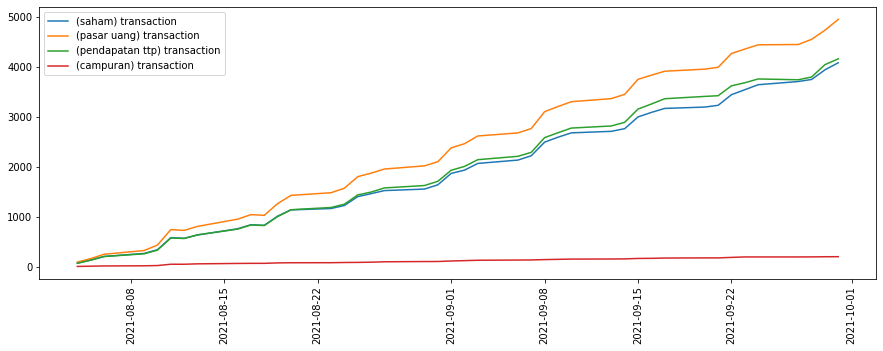

In [108]:
transaction_graph = result[['date','(saham) transaction','(pasar uang) transaction','(pendapatan ttp) transaction','(campuran) transaction']]
# transaction_graph.head()

#Create line chart
plt.figure(figsize =(15, 5))
axis = transaction_graph.columns.tolist()
#axis.head()

for x in axis[1:]:    
  plt.plot(transaction_graph['date'], transaction_graph[x])

plt.xticks(rotation = 90)
plt.legend(transaction_graph.iloc[:,1:],loc = 2)

plt.show()

Insight

* The most frequent users are in money market investments, followed by fixed income investments and then stock investments
* The least frequent users are in mixed investments
* Looking at the transaction trend by mutual fund, the investment amount that is stable and tends not to increase significantly is in stocks, but the trend of the number of users is significantly increasing. It can be said that users who invest in stocks do not do so in large numbers
* Looking at the transaction trend by mutual fund, the largest investment amount is in fixed income. The trend of the number of users in this investment type is the second most frequent after money market, and the number of users is also increasing daily. It can be said that users who influence the investment amount and invest in large amounts are investing in fixed income

Recommendation

1. Encourage users to explore mixed investments, as it is currently the least used investment type.

2. Educate users about the potential benefits of investing in stocks and encourage them to invest in this asset class, as the number of users investing in stocks is increasing significantly.

3. Encourage users to continue investing in fixed income, as it currently has the largest investment amount and the number of users investing in this asset class is also increasing.

4. Monitor the decreasing trend around August 10, 2021, to identify the cause and take appropriate actions if necessary.

5. Analyze the investment behavior of users who invest in large amounts and explore ways to attract more of such users to invest in mutual funds